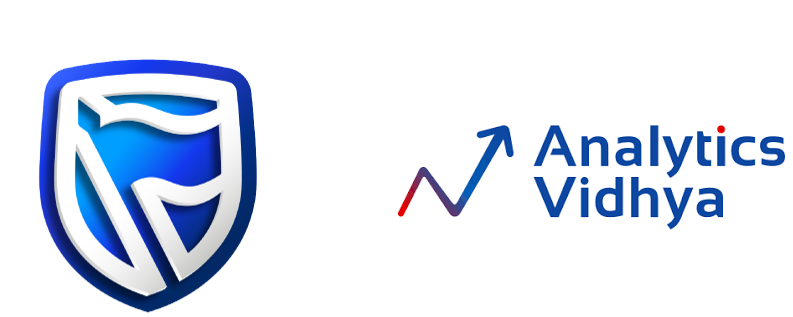


------------------------------------------------------------------


#  <span style="color:darkblue"> Standard Bank Data Science Programme </span>
#  <span style="color:darkred"> Assignment 2 : Credit Card Lead Prediction </span>

---
**NAME:**  <div style="text-align: right"> Haile Selassie Omar Rajá </div>

---
**EMAIL:** <div style="text-align: right"> haile.raja@standardbank.co.mz </div>
 
---
**EMPLOYEE NUMBER:**  <div style="text-align: right"> C834602 </div>

___
**FACILITATOR:**  <div style="text-align: right"> Kaushik Roy Chowdhary </div>

--------------------------------------------------
**DATE:** <div style="text-align: right"> June 18, 2021</div>



<h1><center> <span style="color:darkred"> CREDIT CARD LEAD PREDICTION </span> </center></h1>


## 1. INTRODUCTION


`Happy Customer Bank` is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings. The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 
In this case, the `Happy Customer Bank` wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

The following notebook describes the step taken to perform an Exploratory Data Analysis (EDA) and implementation of a Logistic Regression. Through the application of Logistic Regression it is intended to understand if the Customer is **interested** or not on the Credit Card. This research was developed based on the following question: **What are the factors associated interest of the customer on the credit card?**


**Objectives**

   - Describe the customer profile;
   - Check the bivariate association between the target variable and the other variables;
   - Identify possible factors associated with customer interest.

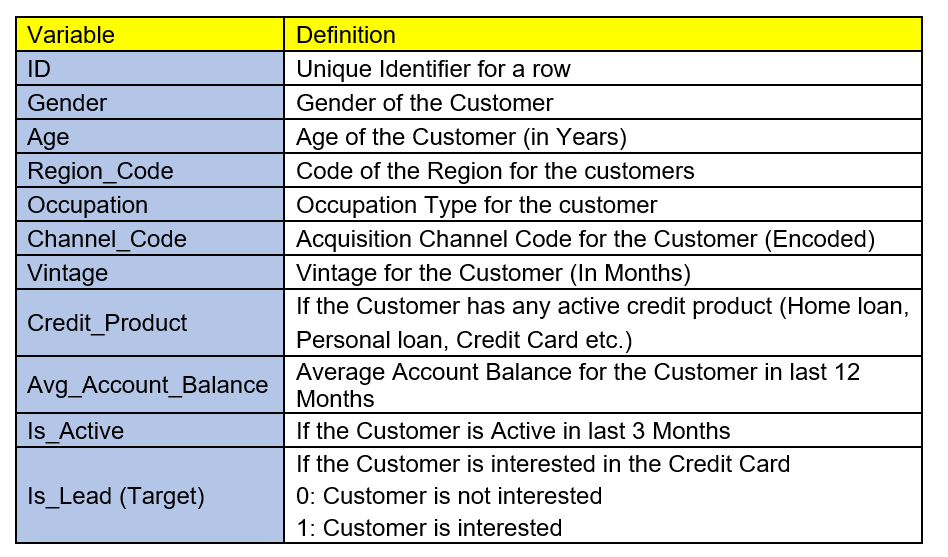

## 2. DATA ANALYSIS

On this slot, we will be interested on performing all the data analysis in order to answer the question given.

In [1800]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report as rep
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings ("ignore")

In [1801]:
#Import the data set
train = pd.read_csv('train_w3zpEd4.csv')
test = pd.read_csv('test_FVWNbHc.csv')

In [1802]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [1803]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [1804]:
print('There are', '\033[1m', train.shape[0], '\033[0m', 'observations and', '\033[1m', train.shape[1], '\033[0m','variables on the train dataset')

There are  245725  observations and  11  variables on the train dataset


In [1805]:
print('There are', '\033[1m', test.shape[0], '\033[0m', 'observations and', '\033[1m', test.shape[1], '\033[0m','variables on the test data')

There are  105312  observations and  10  variables on the test data


In [1806]:
train.dtypes[train.dtypes == 'object']

ID                object
Gender            object
Region_Code       object
Occupation        object
Channel_Code      object
Credit_Product    object
Is_Active         object
dtype: object

There are 7 **object** variables on the train dataset. 

In [1807]:
train.dtypes[train.dtypes != 'object']

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

There are 4 **int64** variables on the train dataset

In [1808]:
round((train.isnull().sum()/train.shape[0])*100,1)

ID                      0.0
Gender                  0.0
Age                     0.0
Region_Code             0.0
Occupation              0.0
Channel_Code            0.0
Vintage                 0.0
Credit_Product         11.9
Avg_Account_Balance     0.0
Is_Active               0.0
Is_Lead                 0.0
dtype: float64

We can see that we have around 12% of missing values on the ``Credit_Product``on the train data.

In [1809]:
round((test.isnull().sum()/test.shape[0])*100,1)

ID                      0.0
Gender                  0.0
Age                     0.0
Region_Code             0.0
Occupation              0.0
Channel_Code            0.0
Vintage                 0.0
Credit_Product         11.9
Avg_Account_Balance     0.0
Is_Active               0.0
dtype: float64

We can see that we have around 12% of missing values on the ``Credit_Product`` on the test data.

### 2.2. UNIVARIATE ANALYSIS

In this section, we will do a univariate analysis as it is the simplest way to analyze data where we examine each variable individually. For *__numerical variables (2.1.1)__*, probability density plot and box plot will be used to look at the distribution of the variables and to identify outliers. For *__categorical variables (2.1.2)__* we will use bar plot which will calculate the number of each category in a particular variable.

#### 2.2.1. NUMERICAL VARIABLES

In [1810]:
numerical = train.select_dtypes(include=['int64','float64'])
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [1811]:
for i in numerical.columns:
    print(f'\033[1mRANGE OF {i.upper()}\033[0m: \n[{train[i].min()}, {train[i].max()}]\n')

RANGE OF AGE: 
[23, 85]

RANGE OF VINTAGE: 
[7, 135]

RANGE OF AVG_ACCOUNT_BALANCE: 
[20790, 10352009]

RANGE OF IS_LEAD: 
[0, 1]



In [1812]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()   
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean", linestyle="--")
    
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i).upper(), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  for j,i in enumerate(var_group):
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.xlabel('{}'.format(i).upper(), fontsize = 20)
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   )) 

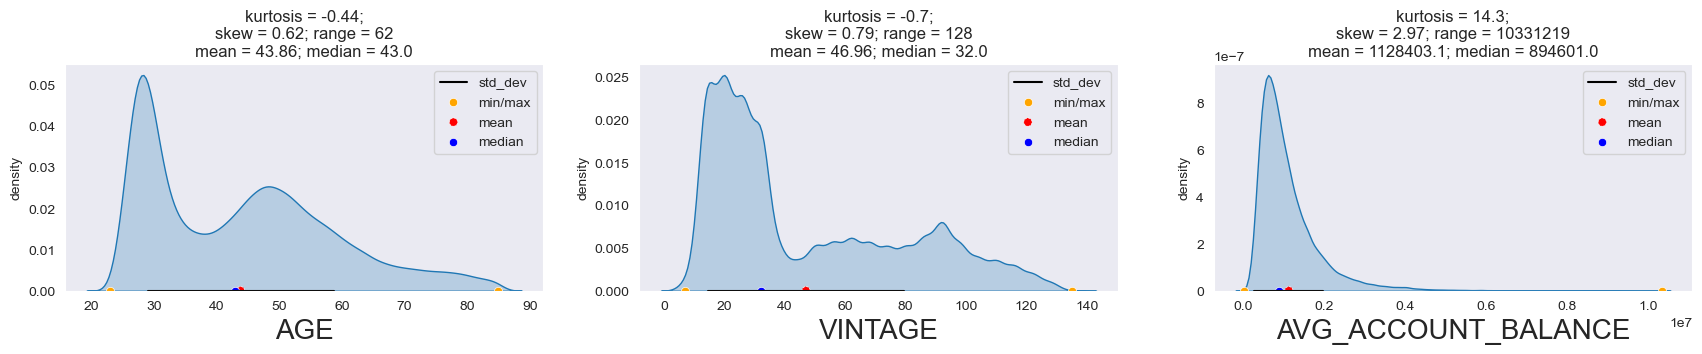

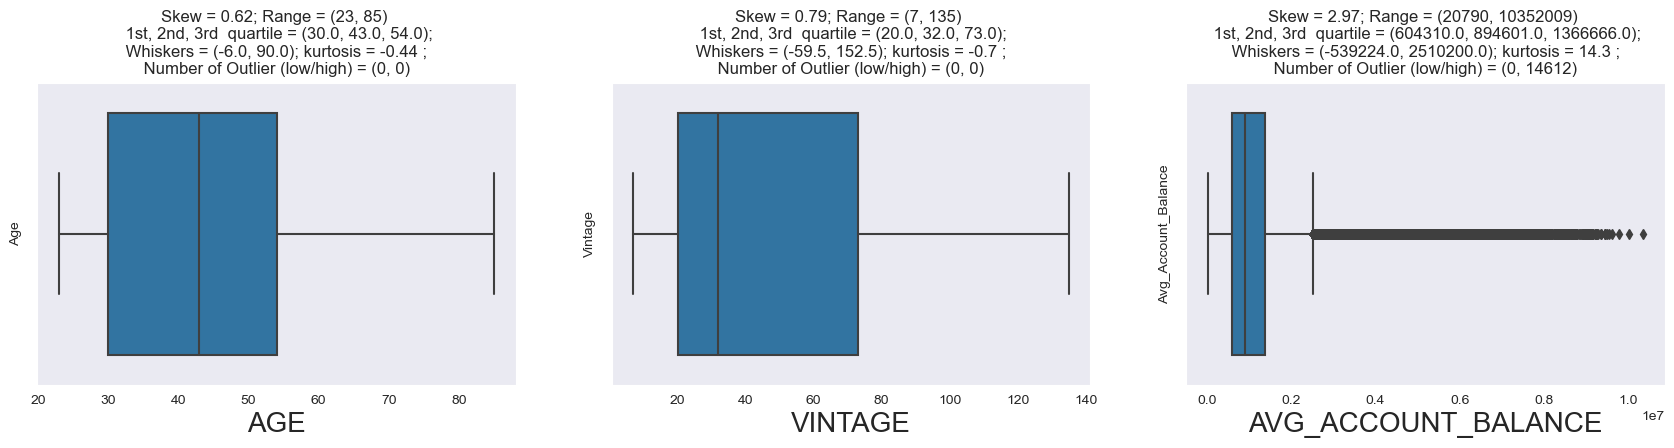

In [1813]:
numeric = ['Age', 'Vintage', 'Avg_Account_Balance']
UVA_KDE(train,numeric),
UVA_boxplot(train,numeric)

From the two type of graphs above, we can have the following results:

**AGE**:
- This variable does not follow a normal distribution (Skew = 0.62 - Right skewed).
- Very less likely to have extreme/outlier values (Kurtosis = -0.44).
- This variable does not have outliers.

**VINTAGE**:
- This variable does not follow a normal distribution (Skew = 0.79 - Right skewed).
- Very less likely to have extreme/outlier values (Kurtosis = -0.7).
- This variable does not have outliers.

**AVERAGE ACCOUNT BALANCE (LAST 12 MONTHS)**:
- This variable does not follow a normal distribution (Skew = 2.97 - Right skewed).
- Very likely to have extreme/outlier values (Kurtosis = 14.3).
- This variable have outliers many outliers.

In order to have variables that follow a normal distribution, we will apply a `LOG-TRANSFORMATION` in all of these variables. This application should be on the train data as well as on the test data .

In [1814]:
train['Age'] = np.log(train['Age'])
train['Vintage'] = np.log(train['Vintage'])
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
test['Age'] = np.log(test['Age'])
test['Vintage'] = np.log(test['Vintage'])
test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])
numerical = train.select_dtypes(include=['int64','float64'])

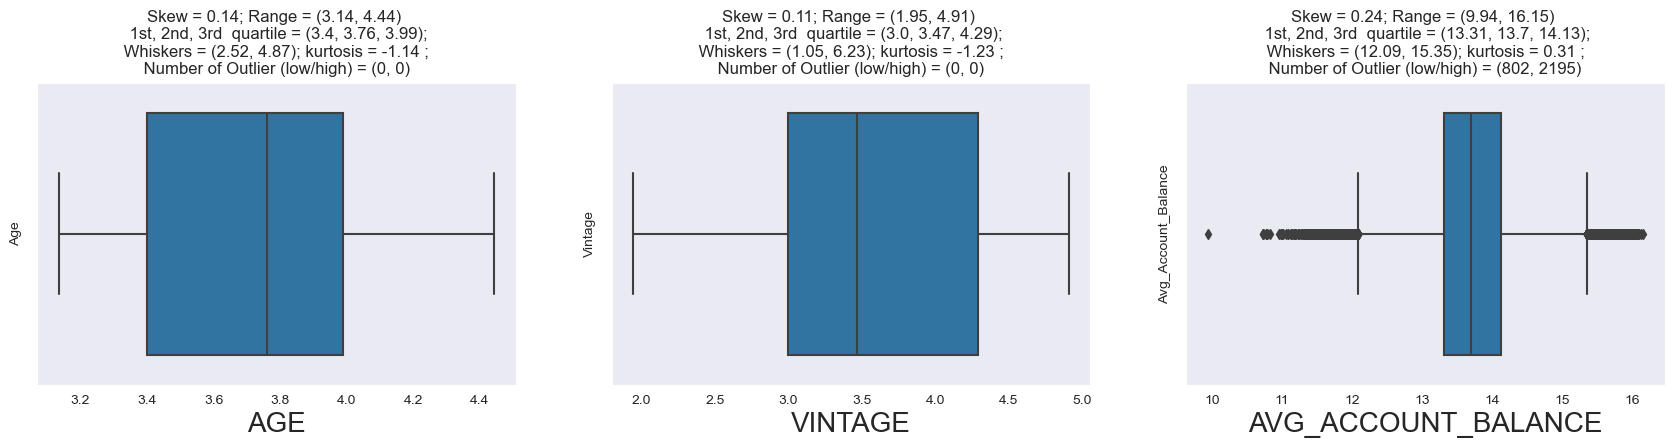

In [1815]:
UVA_boxplot(train,numeric)

Now we can see that all of the variables follow a normal distribution although we still have outliers on the `Avegera account balance (Last 12 months)`.

#### 2.2.1. CATEGORICAL VARIABLES

In [1816]:
categorical = train.select_dtypes(exclude=['int64','float64'])
categorical.dtypes

ID                object
Gender            object
Region_Code       object
Occupation        object
Channel_Code      object
Credit_Product    object
Is_Active         object
dtype: object

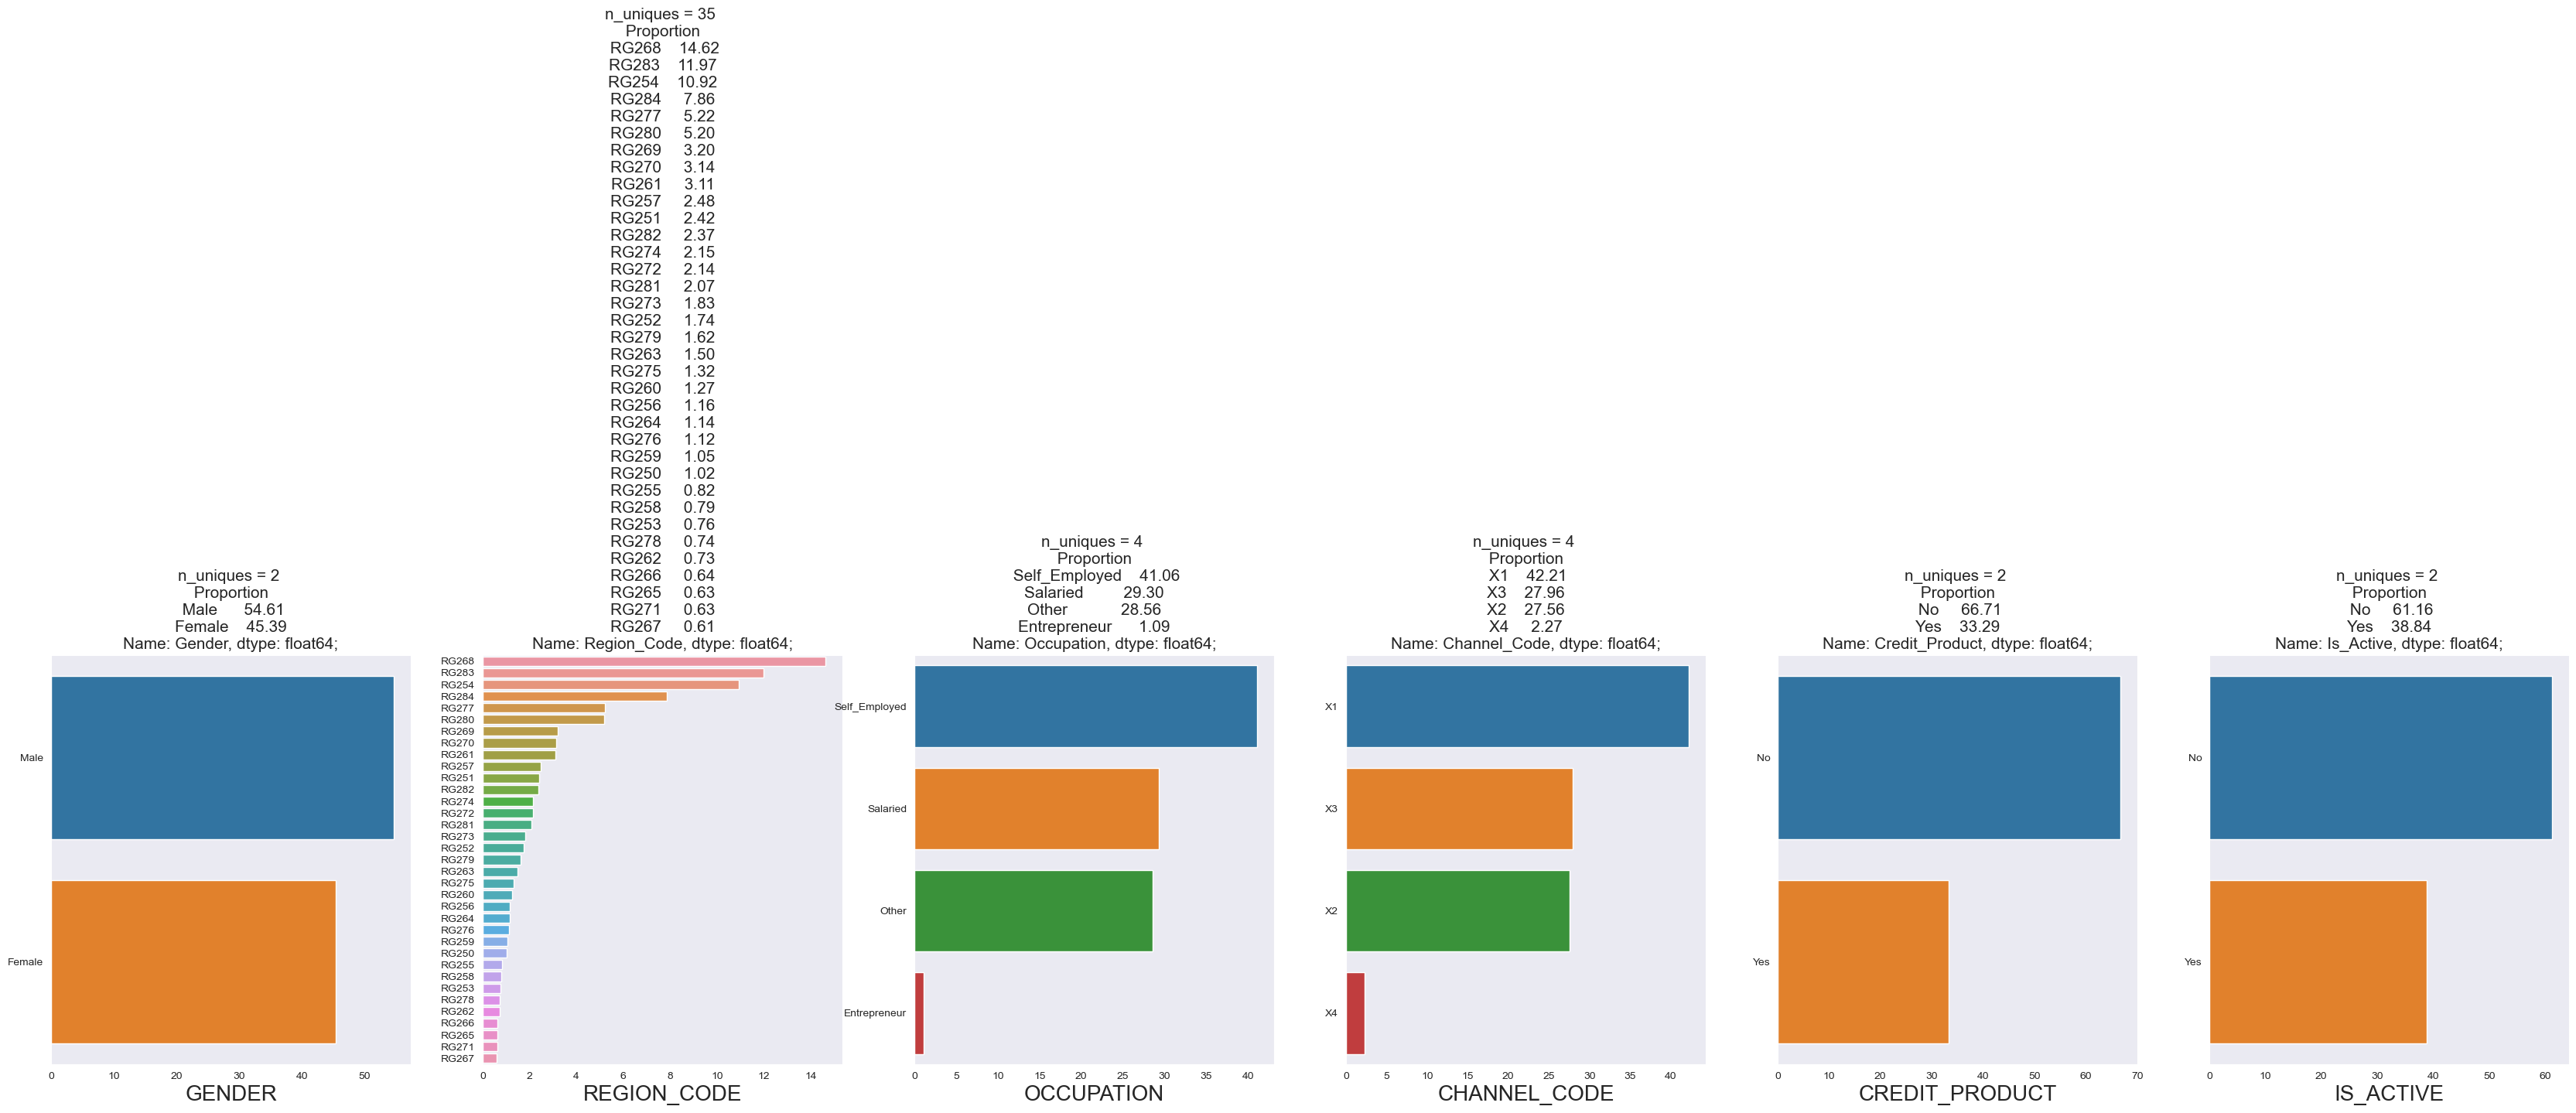

In [1817]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('dark')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('{}'.format(i).upper(), fontsize = 20)
    plt.title('n_uniques = {} \n Proportion \n {};'.format(n_uni,norm_count), fontsize = 15)

UVA_category(train, ['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product', 'Is_Active'])   

**RESULTS:**

It can be inferred from the above `bar plot`  that:
* Around 55% of the customers are _male_;
* Around 41% of the customers are _self-employed_ and 1% are _enterpreneur_;
* Around 71% of the customers does not have a _credit product_;
* Around 61% of the customers are _active_.

### 2.3. BIVARIATE ANALYSIS

#### 2.3.1. NUMERICAL - NUMERICAL

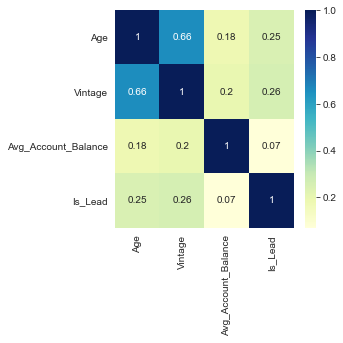

In [1818]:
rounded = round(numerical.corr(method = 'pearson'),2)
plt.figure(figsize=(4,4))
ax = sns.heatmap(rounded, cmap='YlGnBu', annot=True)
plt.show()

From the graph above, we can see that the vintage and te age have the maximum correlation but is not strong enought.

<Figure size 60x40 with 0 Axes>

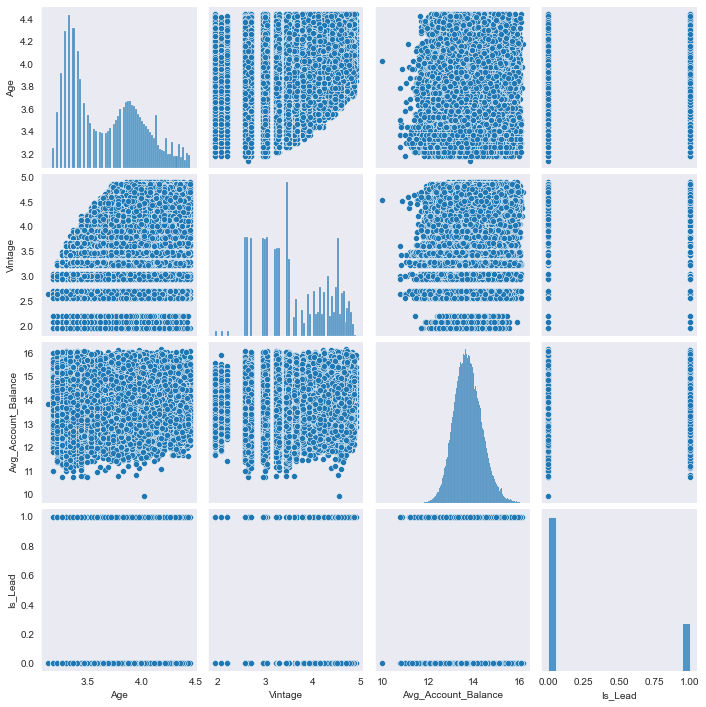

In [1819]:
plt.figure(dpi=10)
sns.pairplot(data = numerical)

#### 2.3.1. NUMERICAL - NUMERICAL

In [1820]:
def BVA_categorical_plot(data, tar, cat):
  data = data[[cat,tar]][:]
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])
  chi, p, dof, expected = chi2_contingency(f_obs)
  if p<0.05:
    sig = 'has'
  else:
    sig = 'do not have'
  ax1 = round(data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100,1)
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  
  print("Chi-square = {}, p-value = {},\nmeaning that the variable {} {} a significant impact on the Customer Interest on the Credit Card\n".format(round(chi,2),round(p,5),cat,sig))

In [1821]:
train['Target_variable'] = 0
train['Target_variable'][(train['Is_Lead']== 0)] = 'Not interested'
train['Target_variable'][(train['Is_Lead']== 1)] = 'Interested'

Chi-square = 1275.9, p-value = 0.0,
meaning that the variable Gender has a significant impact on the Customer Interest on the Credit Card



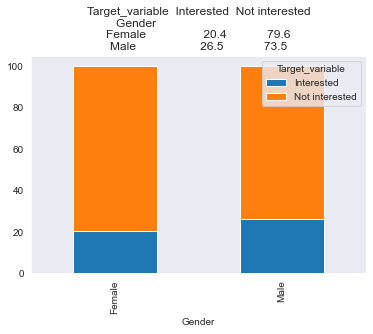

In [1822]:
BVA_categorical_plot(train, 'Target_variable', 'Gender')

Chi-square = 5896.25, p-value = 0.0,
meaning that the variable Occupation has a significant impact on the Customer Interest on the Credit Card



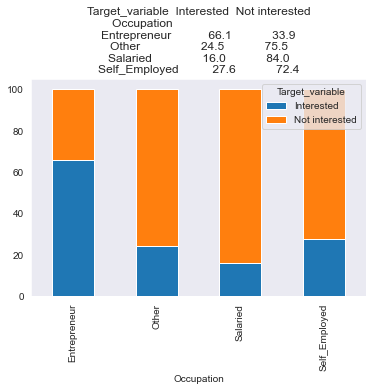

In [1823]:
BVA_categorical_plot(train, 'Target_variable', 'Occupation')

Chi-square = 21494.01, p-value = 0.0,
meaning that the variable Credit_Product has a significant impact on the Customer Interest on the Credit Card



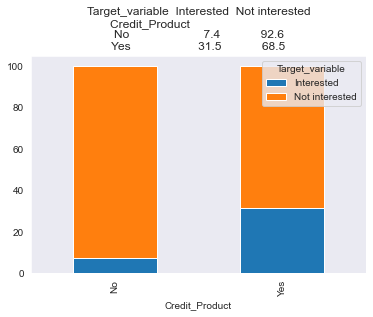

In [1824]:
BVA_categorical_plot(train, 'Target_variable', 'Credit_Product')

Chi-square = 21664.45, p-value = 0.0,
meaning that the variable Channel_Code has a significant impact on the Customer Interest on the Credit Card



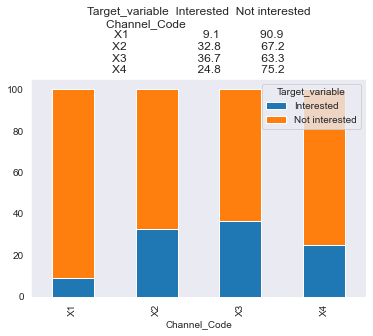

In [1825]:
BVA_categorical_plot(train, 'Target_variable', 'Channel_Code')

Chi-square = 1805.3, p-value = 0.0,
meaning that the variable Is_Active has a significant impact on the Customer Interest on the Credit Card



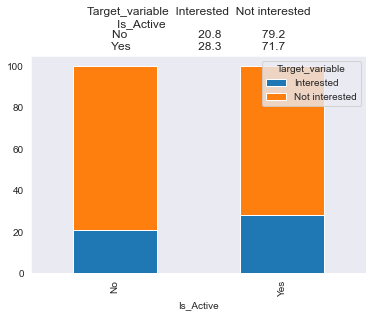

In [1826]:
BVA_categorical_plot(train, 'Target_variable', 'Is_Active')

Chi-square = 3913.67, p-value = 0.0,
meaning that the variable Region_Code has a significant impact on the Customer Interest on the Credit Card



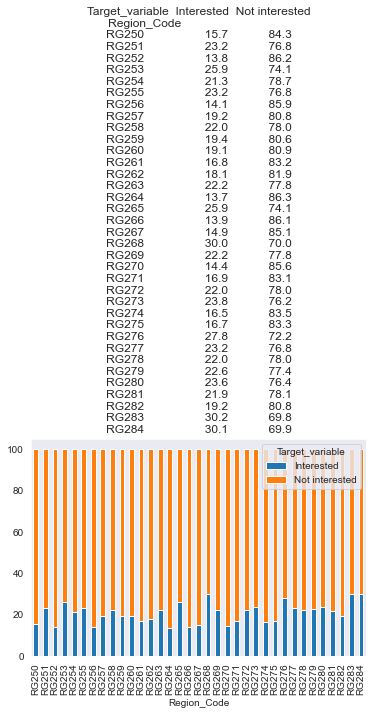

In [1827]:
BVA_categorical_plot(train, 'Target_variable', 'Region_Code')

In [1828]:
train.drop(['Target_variable','ID'],1,inplace = True)

### 2.4. LOGISTIC REGRESSION  APPLICATION

In [1829]:
test.drop(['ID'],1,inplace = True)
train_dummie = train.select_dtypes(include = ['category', 'object']).dtypes
test_dummie = test.select_dtypes(include = ['category', 'object']).dtypes
listtrain = list(train_dummie.index)
listtest = list(test_dummie.index)

In [1830]:
train = pd.get_dummies(train, columns = listtrain)
test = pd.get_dummies(test, columns = listtest)

In [1831]:
train.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,4.290459,3.761200,13.860193,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,3.401197,3.465736,13.274205,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,4.025352,3.258097,14.210464,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,3.526361,2.944439,13.061453,0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,3.401197,3.496508,13.695360,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [1832]:
test.head()

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,3.367296,3.218876,13.517598,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,3.761200,3.891820,13.738129,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3.433987,2.639057,12.282798,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
3,3.367296,3.496508,13.674028,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,3.367296,2.944439,13.395572,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [1833]:
x = train.drop(['Is_Lead'], axis=1)
y = train['Is_Lead']
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 17, stratify = y, test_size = 0.3) 

In [1834]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [1835]:
logreg = LogReg()
logreg.fit(train_x, train_y)
train_predict = logreg.predict(train_x)
print(rep( train_y , train_predict ))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91    131206
           1       0.84      0.48      0.61     40801

    accuracy                           0.85    172007
   macro avg       0.85      0.72      0.76    172007
weighted avg       0.85      0.85      0.84    172007



In [1836]:
logreg.fit(test_x, test_y)
test_predict = logreg.predict(test_x)
print(rep( test_y , test_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     56231
           1       0.83      0.48      0.61     17487

    accuracy                           0.85     73718
   macro avg       0.84      0.72      0.76     73718
weighted avg       0.85      0.85      0.84     73718



In [1837]:
i=1 
kf=StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y): 
    x_tra, x_tes = x.iloc[train_index], x.iloc[test_index]
    y_tra, y_tes = y.iloc[train_index], y.iloc[test_index]
    model = LogReg(random_state=1)
    model.fit(x_tra,y_tra)
    pred_test=model.predict(x_tes)
    score=accuracy_score(y_tes,pred_test)
    print('\n{} of K-fold {}'.format(i,kf.n_splits), '\033[1mAccuracy Score\033[0m =',round(score,4)*100)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(x_tes)[:,1]


1 of K-fold 5 Accuracy Score = 85.15

2 of K-fold 5 Accuracy Score = 85.55

3 of K-fold 5 Accuracy Score = 85.37

4 of K-fold 5 Accuracy Score = 85.54

5 of K-fold 5 Accuracy Score = 85.52


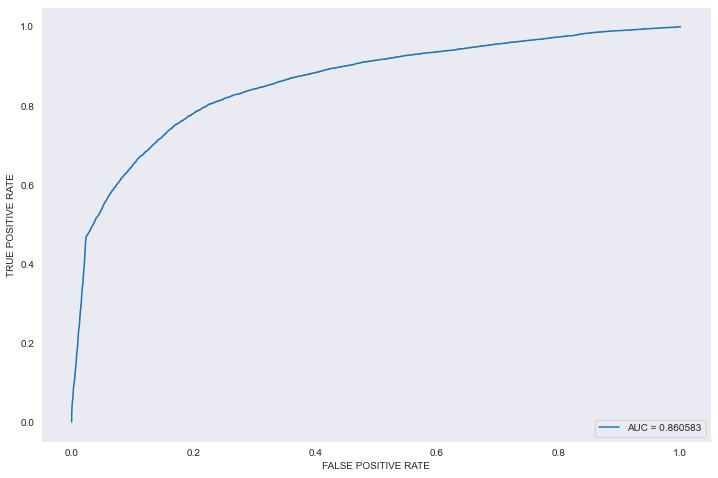

In [1838]:
fpr, tpr, _ = metrics.roc_curve(y_tes, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label = 'AUC = ' + str(round(auc,6)))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

In [1839]:
prob=model.predict_proba(test)[:,1]
probdf = pd.DataFrame(prob)
submission = sample
submission['Is_Lead'] = probdf
submission['ID'] = sample['ID'] 
pd.DataFrame(submission, columns = ['ID','Is_Lead']).to_csv('Haile_submission.csv', index = None)

**FEATURES ENGINEERING**

In order to improve the model to be more accurate, we will engine some features.

1. First we will create a variable that will represent the missing values for the `Credit Product`.

In [2076]:
train = pd.read_csv('train_w3zpEd4.csv')
test = pd.read_csv('test_FVWNbHc.csv')
sample = pd.read_csv('sample_qLwiNhb.csv')

train['Credit_Product'].fillna('99', inplace = True)
test['Credit_Product'].fillna('99', inplace = True)
test["Credit_Product_NA"]=test["Credit_Product"].isnull()*1
train["Credit_Product_NA"]=train["Credit_Product"].isnull()*1

2. Now we will create bins for the `Age`, `Average Account Balance (Last 12 months)` and `Vintage`.

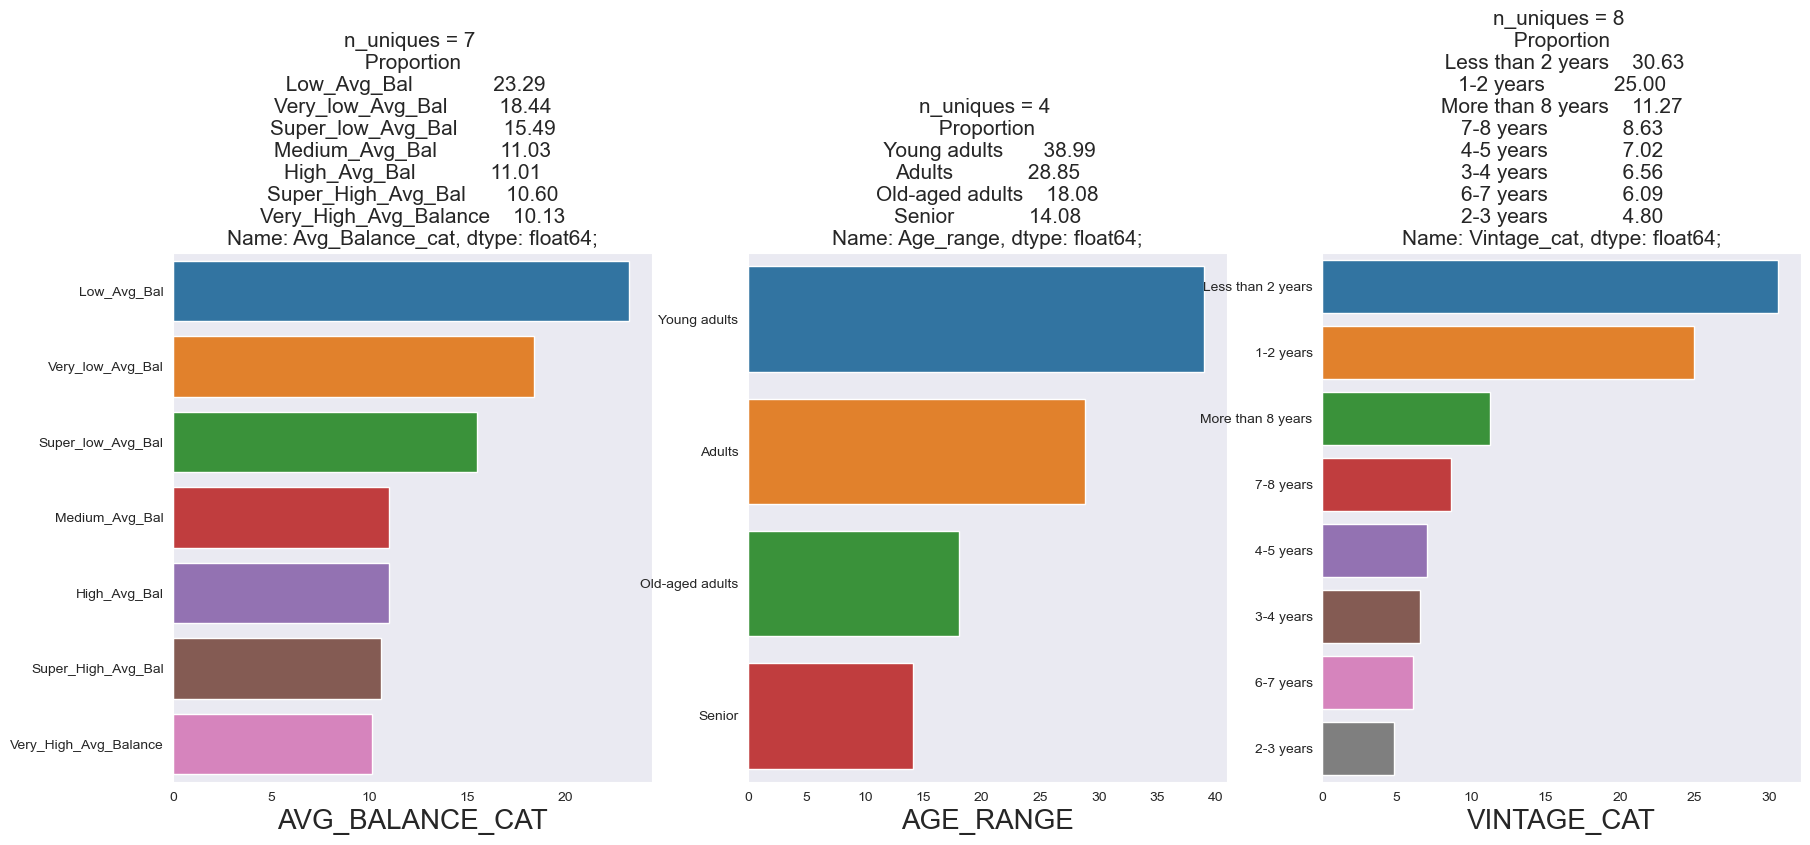

In [2077]:
test['Vintage_cat'] = 'str'
test['Vintage_cat'][(test['Vintage']<= 24)] = 'Less than 2 years'
test['Vintage_cat'][(test['Vintage']> 24) & (test['Vintage']<= 36)] = '1-2 years'
test['Vintage_cat'][(test['Vintage']> 36) & (test['Vintage']<= 48)] = '2-3 years'
test['Vintage_cat'][(test['Vintage']> 48) & (test['Vintage']<= 60)] = '3-4 years'
test['Vintage_cat'][(test['Vintage']> 60) & (test['Vintage']<= 72)] = '4-5 years'
test['Vintage_cat'][(test['Vintage']> 72) & (test['Vintage']<= 84)] = '6-7 years'
test['Vintage_cat'][(test['Vintage']> 84) & (test['Vintage']<= 96)] = '7-8 years'
test['Vintage_cat'][(test['Vintage']> 96)] = 'More than 8 years'
test['Vintage_cat'] = test['Vintage_cat'].astype('category')


train['Age_range'] = 'str'
train['Age_range'][(train['Age']<= 35)] = 'Young adults'
train['Age_range'][(train['Age']> 35) & (train['Age']<= 50)] = 'Adults'
train['Age_range'][(train['Age']> 50) & (train['Age']<= 60)] = 'Old-aged adults'
train['Age_range'][(train['Age']> 60)] = 'Senior'
train['Age_range'] = train['Age_range'].astype('category')
 
test['Age_range'] = 'str'
test['Age_range'][(test['Age']<= 35)] = 'Young adults'
test['Age_range'][(test['Age']> 35) & (test['Age']<= 50)] = 'Adults'
test['Age_range'][(test['Age']> 50) & (test['Age']<= 60)] = 'Old-aged adults'
test['Age_range'][(test['Age']> 60)] = 'Senior'
test['Age_range'] = test['Age_range'].astype('category')


train['Avg_Balance_cat'] = None
train['Avg_Balance_cat'][(train['Avg_Account_Balance']<= 500000)] = 'Super_low_Avg_Bal'
train['Avg_Balance_cat'][(train['Avg_Account_Balance'] > 500000) & (train['Avg_Account_Balance']<= 700000)] = 'Very_low_Avg_Bal'
train['Avg_Balance_cat'][(train['Avg_Account_Balance'] > 700000) & (train['Avg_Account_Balance']<= 1000000)] = 'Low_Avg_Bal'
train['Avg_Balance_cat'][(train['Avg_Account_Balance'] > 1000000) & (train['Avg_Account_Balance']<= 1200000)] = 'Medium_Avg_Bal'
train['Avg_Balance_cat'][(train['Avg_Account_Balance'] > 1200000) & (train['Avg_Account_Balance']<=1500000)] = 'High_Avg_Bal'
train['Avg_Balance_cat'][(train['Avg_Account_Balance'] > 1500000) & (train['Avg_Account_Balance']<=2000000)] = 'Very_High_Avg_Balance'
train['Avg_Balance_cat'][(train['Avg_Account_Balance'] > 2000000)] = 'Super_High_Avg_Bal' 
train['Avg_Balance_cat'] = train['Avg_Balance_cat'].astype('category')


test['Avg_Balance_cat'] = None
test['Avg_Balance_cat'][(test['Avg_Account_Balance']<= 500000)] = 'Super_low_Avg_Bal'
test['Avg_Balance_cat'][(test['Avg_Account_Balance'] > 500000) & (test['Avg_Account_Balance']<= 700000)] = 'Very_low_Avg_Bal'
test['Avg_Balance_cat'][(test['Avg_Account_Balance'] > 700000) & (test['Avg_Account_Balance']<= 1000000)] = 'Low_Avg_Bal'
test['Avg_Balance_cat'][(test['Avg_Account_Balance'] > 1000000) & (test['Avg_Account_Balance']<= 1200000)] = 'Medium_Avg_Bal'
test['Avg_Balance_cat'][(test['Avg_Account_Balance'] > 1200000) & (test['Avg_Account_Balance']<=1500000)] = 'High_Avg_Bal'
test['Avg_Balance_cat'][(test['Avg_Account_Balance'] > 1500000) & (test['Avg_Account_Balance']<=2000000)] = 'Very_High_Avg_Bal'
test['Avg_Balance_cat'][(test['Avg_Account_Balance'] > 2000000)] = 'Super_High_Avg_Bal'
test['Avg_Balance_cat'] = test['Avg_Balance_cat'].astype('category')

train['Vintage_cat'] = 'str'
train['Vintage_cat'][(train['Vintage']<= 24)] = 'Less than 2 years'
train['Vintage_cat'][(train['Vintage']> 24) & (train['Vintage']<= 36)] = '1-2 years'
train['Vintage_cat'][(train['Vintage']> 36) & (train['Vintage']<= 48)] = '2-3 years'
train['Vintage_cat'][(train['Vintage']> 48) & (train['Vintage']<= 60)] = '3-4 years'
train['Vintage_cat'][(train['Vintage']> 60) & (train['Vintage']<= 72)] = '4-5 years'
train['Vintage_cat'][(train['Vintage']> 72) & (train['Vintage']<= 84)] = '6-7 years'
train['Vintage_cat'][(train['Vintage']> 84) & (train['Vintage']<= 96)] = '7-8 years'
train['Vintage_cat'][(train['Vintage']> 96)] = 'More than 8 years'
train['Vintage_cat'] = train['Vintage_cat'].astype('category')

UVA_category(train, ['Avg_Balance_cat', 'Age_range','Vintage_cat'])  

Let's check if these variable created have a significant impact on the target variable.

Chi-square = 20607.36, p-value = 0.0,
meaning that the variable Age_range has a significant impact on the Customer Interest on the Credit Card

Chi-square = 1476.65, p-value = 0.0,
meaning that the variable Avg_Balance_cat has a significant impact on the Customer Interest on the Credit Card

Chi-square = 23415.45, p-value = 0.0,
meaning that the variable Vintage_cat has a significant impact on the Customer Interest on the Credit Card



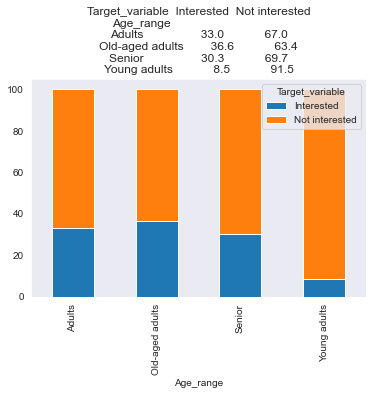

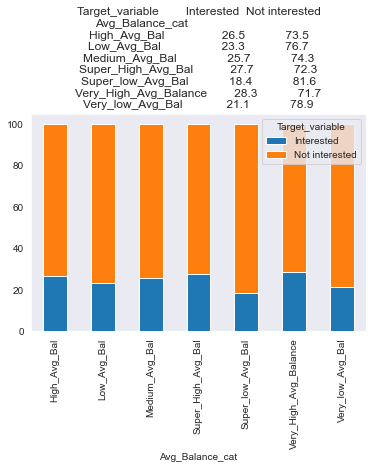

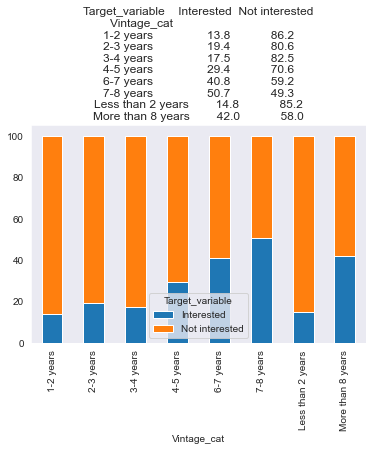

In [2078]:
train['Target_variable'] = 0
train['Target_variable'][(train['Is_Lead']== 0)] = 'Not interested'
train['Target_variable'][(train['Is_Lead']== 1)] = 'Interested'
BVA_categorical_plot(train, 'Target_variable', 'Age_range'),
BVA_categorical_plot(train, 'Target_variable', 'Avg_Balance_cat'),
BVA_categorical_plot(train, 'Target_variable', 'Vintage_cat')

In [2083]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
train['Vintage'] = np.log(train['Vintage'])
train['Age'] = np.log(train['Age'])

test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])
test['Vintage'] = np.log(test['Vintage'])
test['Age'] = np.log(test['Age'])


1 of K-fold 5 Accuracy Score = 85.41

2 of K-fold 5 Accuracy Score = 85.63

3 of K-fold 5 Accuracy Score = 85.56

4 of K-fold 5 Accuracy Score = 85.61

5 of K-fold 5 Accuracy Score = 85.74000000000001


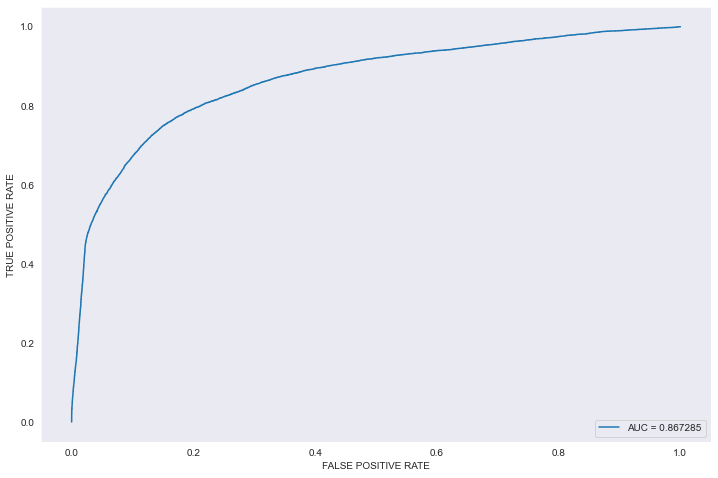

In [2087]:
train.drop(['Target_variable','ID'],1,inplace = True)
test.drop(['ID'],1,inplace = True)
train_dummie = train.select_dtypes(include = ['category', 'object']).dtypes
test_dummie = test.select_dtypes(include = ['category', 'object']).dtypes
listtrain = list(train_dummie.index)
listtest = list(test_dummie.index)

train = pd.get_dummies(train, columns = listtrain)
test = pd.get_dummies(test, columns = listtest)

x = train.drop(['Is_Lead'], axis=1)
y = train['Is_Lead']
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 17, stratify = y, test_size = 0.3) 

# scaler = StandardScaler()
scaler= MaxAbsScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

i=1 
kf=StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y): 
    x_tra, x_tes = x.iloc[train_index], x.iloc[test_index]
    y_tra, y_tes = y.iloc[train_index], y.iloc[test_index]
    model = LogReg(random_state=1)
    model.fit(x_tra,y_tra)
    pred_test=model.predict(x_tes)
    score=accuracy_score(y_tes,pred_test)
    print('\n{} of K-fold {}'.format(i,kf.n_splits), '\033[1mAccuracy Score\033[0m =',round(score,4)*100)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(x_tes)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_tes, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label = 'AUC = ' + str(round(auc,6)))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()


prob=model.predict_proba(test)[:,1]
probdf = pd.DataFrame(prob)
submission = sample
submission['Is_Lead'] = probdf
submission['ID'] = sample['ID'] 
pd.DataFrame(submission, columns = ['ID','Is_Lead']).to_csv('Haile_submission.csv', index = None)